<a href="https://colab.research.google.com/github/Lakshmana219/ML-Work/blob/master/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import plotly.express as ex

In [0]:
!ls

'Hotel Booking.ipynb'   hotel_bookings.csv   sample_data


In [0]:
hotel_book = pd.read_csv("hotel_bookings.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
hotel_book.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [0]:
hotel_book.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [0]:
hotel_book.shape

(119390, 32)

In [0]:
hotel_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [0]:
hotel_book.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [0]:
hotel_book[['is_canceled', 'arrival_date_month']].head()

,is_canceled,arrival_date_month
0,0,July
1,0,July
2,0,July
3,0,July
4,0,July


In [0]:
Hotel_cancelation_Months = hotel_book.groupby('arrival_date_month')[['is_canceled']].sum().sort_values("is_canceled",ascending =True).reset_index()
Hotel_cancelation_Months.head()

,arrival_date_month,is_canceled
0,January,586
1,November,593
2,December,847
3,February,1362
4,March,1689


In [0]:
fig = ex.scatter(Hotel_cancelation_Months, x='arrival_date_month', y='is_canceled', size='is_canceled', color = 'arrival_date_month', title='Number of  Cancelled over months (2015,2016,2017)')
fig.show()

In [0]:
Hotel_cancelation_day = hotel_book.groupby('arrival_date_day_of_month')[['is_canceled']].sum().sort_values("is_canceled",ascending =True).reset_index()
Hotel_cancelation_day.head()

,arrival_date_day_of_month,is_canceled
0,31,449
1,21,562
2,23,574
3,10,653
4,29,660


In [0]:
fig = ex.scatter(Hotel_cancelation_day, x='arrival_date_day_of_month', y='is_canceled', size='is_canceled', color = 'is_canceled', title='Number of  Cancelled over months (2015,2016,2017)')
fig.show()

In [0]:
hotel_type = hotel_book['hotel'].value_counts().rename_axis('hotel').reset_index(name='count')

In [0]:
fig = ex.bar(hotel_type, x='hotel', y='count')
fig.show()

In [0]:
canceled = hotel_book['is_canceled'].value_counts().rename_axis('canceled_label').reset_index(name='count')

In [0]:
fig = ex.bar(canceled, x='canceled_label', y='count', title='Number of Canceled reservations!')
fig.show()

In [0]:
Market_Years = hotel_book['arrival_date_year'].value_counts().rename_axis('Years').reset_index(name='count')
fig = ex.bar(Market_Years, x='Years', y='count', title='Hotel Traffic', color= 'count')
fig.show()

In [0]:
from sorted_months_weekdays import Month_Sorted_Month

ModuleNotFoundError: ignored

In [0]:
Market_month= hotel_book['arrival_date_month'].value_counts().rename_axis('Month').reset_index(name='count')
#Market_month['Month'] = Month_Sorted_Month(Market_month['Month'])
fig = ex.bar(Market_month, x='Month', y='count', title='Hotel Traffic per Months', color='count')
fig.show()

In [0]:
hotel_book['stays_in_weekend_nights'].value_counts().rename_axis('weekend_night').reset_index(name='count')

,weekend_night,count
0,0,51998
1,2,33308
2,1,30626
3,4,1855
4,3,1259
5,6,153
6,5,79
7,8,60
8,7,19
9,9,11


In [0]:
country = hotel_book['country'].value_counts().rename_axis('country').reset_index(name='count')
countries = country.head(14)
fig = ex.bar(countries, y='country', x='count', title='Country', orientation='h')
fig.show()

In [0]:
hotel_book['reservation_status'].value_counts()

Check-Out    34665
Canceled     23421
No-Show        803
Name: reservation_status, dtype: int64

In [0]:
adults = hotel_book['adults'].value_counts().rename_axis('adults').reset_index(name='count')

In [0]:
fig = ex.box(hotel_book,y='adults')
fig.show()

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(hotel_book))
print(z)

TypeError: can only concatenate str (not "float") to str

In [0]:
threshold = 2
print(np.where(z>threshold))

(array([0, 9]), array([1, 0]))


In [0]:
adults[(z>0).all(axis=1)]

,adults,count
0,2,89680
1,1,23027
2,3,6202
3,0,403
4,4,62
5,26,5
6,27,2
7,20,2
8,5,2
9,55,1


In [0]:
hotel_book.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [0]:
fig = ex.box(hotel_book, y='children')
fig.show()

In [0]:
hotel_book['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [0]:
hotel_book['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [0]:
hotel_book.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Predicting 2018-Jan-01 reservations count

In [0]:
hotel_book.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

1. Regression Model - > Linear, Polynomiay, SVR, 
2. Important Columns
3. We no need to take only postive cases of reservation
4. Do we Need to Encode the Labels? 

In [0]:
hotel_book.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


###Column Names - As per our understanding

In [0]:
columns = ['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
          'stays_in_weekend_nights', 'stays_in_week_nights', 'country']

In [0]:
hotel_reservations =  hotel_book[columns]

In [0]:
hotel_reservations.isnull().sum()

hotel                          0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
country                      478
dtype: int64

### Dropping NUll Values

In [0]:
hotel_reservations.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
hotel_reservations.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,country
0,Resort Hotel,342,2015,July,1,0,0,PRT
1,Resort Hotel,737,2015,July,1,0,0,PRT
2,Resort Hotel,7,2015,July,1,0,1,GBR
3,Resort Hotel,13,2015,July,1,0,1,GBR
4,Resort Hotel,14,2015,July,1,0,2,GBR


In [0]:
hotel_reservations.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'country'],
      dtype='object')

In [0]:
hotel_reservations['hotel'].head()

0    Resort Hotel
1    Resort Hotel
2    Resort Hotel
3    Resort Hotel
4    Resort Hotel
Name: hotel, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
hotel_reservations['hotel_label'] = LE.fit_transform(hotel_reservations['hotel'])
hotel_reservations['month_label'] = LE.fit_transform(hotel_reservations['arrival_date_month'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
hotel_reservations.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,country,hotel_label,month_label
0,Resort Hotel,342,2015,July,1,0,0,PRT,1,5
1,Resort Hotel,737,2015,July,1,0,0,PRT,1,5
2,Resort Hotel,7,2015,July,1,0,1,GBR,1,5
3,Resort Hotel,13,2015,July,1,0,1,GBR,1,5
4,Resort Hotel,14,2015,July,1,0,2,GBR,1,5


In [0]:
hotel_reservations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58412 entries, 0 to 58889
Data columns (total 10 columns):
hotel                        58412 non-null object
lead_time                    58412 non-null int64
arrival_date_year            58412 non-null int64
arrival_date_month           58412 non-null object
arrival_date_day_of_month    58412 non-null int64
stays_in_weekend_nights      58412 non-null int64
stays_in_week_nights         58412 non-null int64
country                      58412 non-null object
hotel_label                  58412 non-null int64
month_label                  58412 non-null int64
dtypes: int64(7), object(3)
memory usage: 4.9+ MB


In [0]:
hotel_reservations_count = hotel_reservations.groupby(['hotel_label','arrival_date_year', 'month_label', 'arrival_date_day_of_month'])\
[['arrival_date_day_of_month']].count()


In [0]:
hotel_reservations_count.columns = ['count']

In [0]:
hotel_reservations_count = hotel_reservations_count.reset_index()

In [0]:
hotel_reservations_count.shape

(1264, 5)

In [0]:
hotel_reservations_count.tail()

,hotel_label,arrival_date_year,month_label,arrival_date_day_of_month,count
1259,1,2017,8,27,40
1260,1,2017,8,28,99
1261,1,2017,8,29,50
1262,1,2017,8,30,53
1263,1,2017,8,31,60


In [0]:
hotel_reservations_count['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [0]:
from sklearn.model_selection import train_test_split
y = hotel_reservations_count['count']
X = hotel_reservations_count.drop(['count'], axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234, shuffle = True)

In [0]:
print('Shape of the X_training Data',X_train.shape)
print('Shape of the y_training Data',y_train.shape)
print()
print('Shape of the X_testing Data',X_test.shape)
print('Shape of the X_testing Data',y_test.shape)

Shape of the X_training Data (1011, 4)
Shape of the y_training Data (1011,)

Shape of the X_testing Data (253, 4)
Shape of the X_testing Data (253,)


In [0]:
from sklearn.linear_model import LinearRegression

# Calling model :) 
model = LinearRegression(normalize=True, n_jobs=-1)

# Training the Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [0]:
model.score(X_test,y_test)

0.043704441632459456

In [0]:
y_pre = model.predict(X_test)

In [0]:
test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pre})
test

,Actual,Predicted
599,101,106.405317
78,91,85.443234
208,87,91.038932
1236,103,53.847441
950,51,44.412817
...,...,...
1483,46,62.793160
658,60,111.744644
529,67,109.568809
543,82,110.546621


NameError: ignored

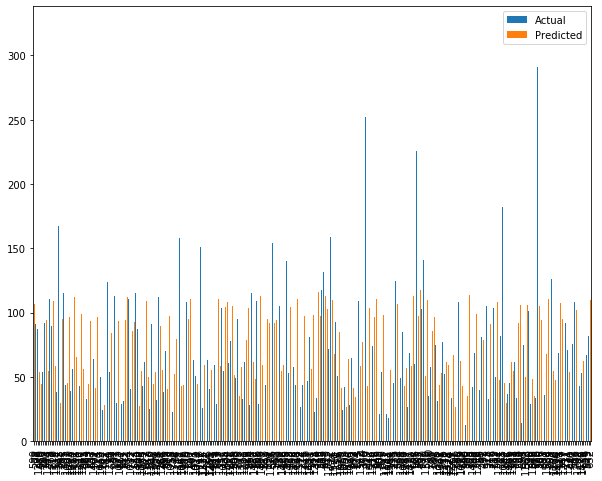

In [0]:
test.plot(kind='bar',figsize=(10,8))

In [0]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pre))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pre))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pre)))

Mean Absolute Error: 26.872550356750406
Mean Squared Error: 1485.5634866019564
Root Mean Squared Error: 38.543008271305915
